In [1]:
import pandas as pd

In [3]:
df =pd.read_csv("customer_churn_data.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [7]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [10]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [12]:
df['InternetService']=df['InternetService'].fillna("")

In [14]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
               297
Name: count, dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [21]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [22]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

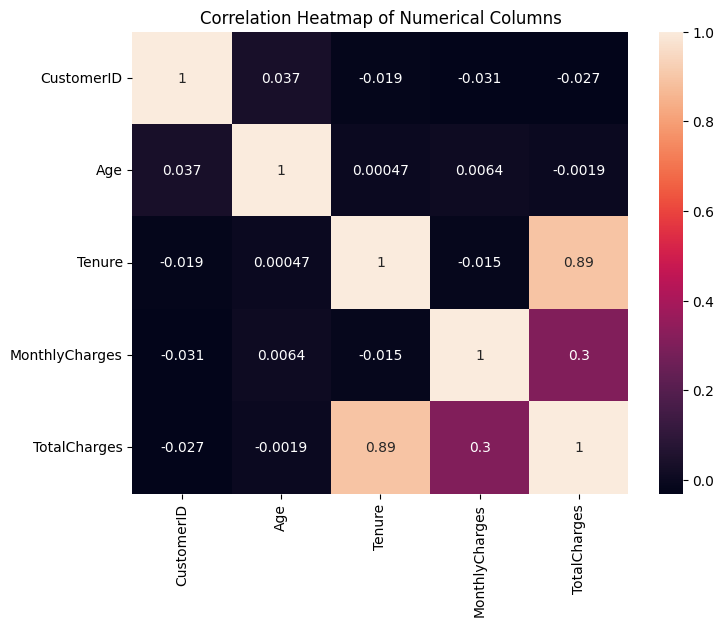

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns_data.corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

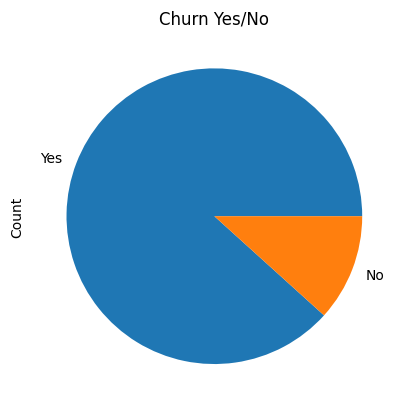

In [28]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Yes/No")
plt.ylabel("Count")
plt.show()

In [29]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [30]:
# the customers with high charges are likely to churn

df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [ ]:
# gender is not impacting much
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [32]:
# the people who have taken service from long period have less churn rate
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [ ]:
df.groupby("Churn")["Age"].mean()

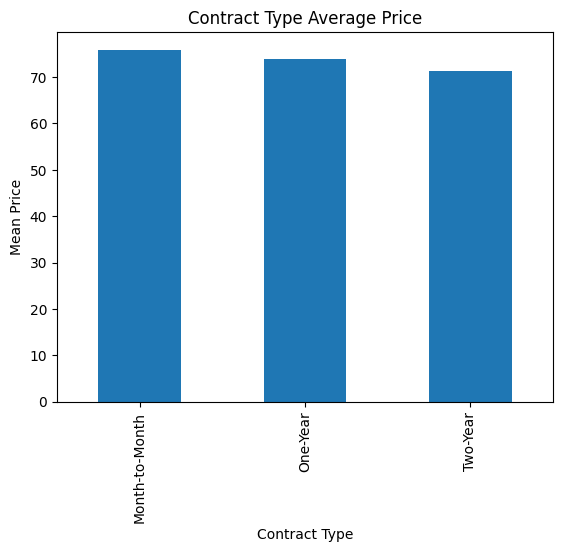

In [36]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

In [37]:
#  At the lower terms we can see that the monthly charge average decrease 

In [38]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


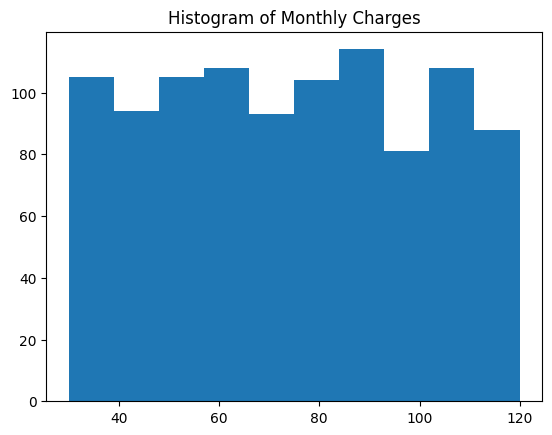

In [40]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

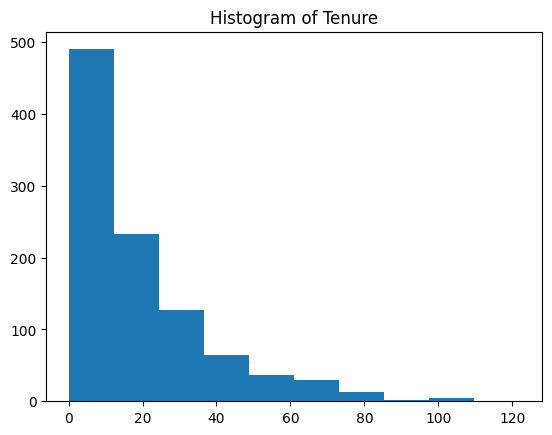

In [42]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [43]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [48]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [47]:
X["Gender"] =X["Gender"].apply(lambda x: 1 if x =="Female" else 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11640\3569857988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] =X["Gender"].apply(lambda x: 1 if x =="Female" else 0)


In [49]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [52]:
y["Churn"] =y["Churn"].apply(lambda x: 1 if x =="Yes" else 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11640\2671226044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] =y["Churn"].apply(lambda x: 1 if x =="Yes" else 0)


In [53]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


- Gender : 1-> Female, 0-> Male
- Churn : 1-> yes, 0-> no

In [55]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)

In [60]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [61]:
X_test = scaler.fit_transform(X_test)

In [62]:
from sklearn.metrics import accuracy_score
def modelperformance(y_pred):
    print("Accracy score on model is {}".format(accuracy_score(y_test, y_pred)))

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
log_model = LogisticRegression()

In [77]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = log_model.predict(X_test)

In [79]:
modelperformance(y_pred)

Accracy score on model is 0.875


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
param_grid ={
    "n_neighbors":[3,4,5,6,7,8,9],
    "weights":["uniform","distance"],
}

In [102]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [103]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [104]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [105]:
y_pred = gridkn.predict(X_test)

In [106]:
modelperformance(y_pred)

Accracy score on model is 0.855


In [100]:
from sklearn.svm import SVC

In [107]:
svc = SVC()

In [108]:
param_grid ={
    "C" : [0.01, 0.1, 0.5,1],
    "kernel":["linear", "rbf", "poly"]
}

In [109]:
gridsvc = GridSearchCV(svc, param_grid,cv=5 )

In [110]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [112]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [116]:
y_pred =gridsvc.predict(X_test)

In [117]:
modelperformance(y_pred)

Accracy score on model is 0.88


In [118]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [124]:
dtc = DecisionTreeClassifier()

In [125]:
griddc = GridSearchCV(dtc, param_grid, cv=5)

In [126]:
griddc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [127]:
griddc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [128]:
y_pred = griddc.predict(X_test)

In [129]:
modelperformance(y_pred)

Accracy score on model is 0.86


In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [131]:
param_grid ={
    "n_estimators" :[32,64,128,256],
    "max_features" :[2,3,4],
    "bootstrap" :[True, False]
}

In [132]:
grid_rfc = GridSearchCV(rfc, param_grid, cv=5)

In [133]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [134]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [135]:
y_pred = grid_rfc.predict(X_test)

In [136]:
modelperformance(y_pred)

Accracy score on model is 0.855


In [138]:
best_model =gridsvc.best_estimator_

In [139]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [140]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')